# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Integrantes:** Diego Olivares, Amelie Ramirez y Zhibin Xue <br>

# <h1><center>Análisis de Tendencias en Videos Musicales de YouTube: Patrones que Influyen en el Éxito de los Videos Musicales</center></h1>

## Introducción

Debido a la gran cantidad de información extraida se tomó la decisión de crear tres ``noteboks`` distintos para la recolección de datos estos se guardaran en la carpeta ``data/`` al igual que la información recolectada:

Estos se tienen que ejecutar en este orden:
1. ``youtube.ipynb``
2. ``spotify.ipynb``
3. ``last.fm.ipynb``
4. ``spotify_youtube.ipynb``
5. ``youttube_last.fm.ipynb``
6. ``youtube_en_spotify``

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

## Contexto y motivación

En el contexto de la gran era de la digitalización, la humanidad ha creado nuevos inventos que transforman la manera en que se consume la música. Hoy en día, escuchar música a través de aparatos electrónicos como celulares, computadoras y radios se ha convertido en una práctica común y accesible. Este avance ha propiciado el surgimiento de nuevas formas de interacción y personalización para los usuarios.

Entre estas aplicaciones se encuentra *Spotify*, una plataforma de streaming de música que ofrece una experiencia única y personalizada. Spotify permite a sus usuarios crear y escuchar playlists adaptadas a sus gustos, gracias a algoritmos avanzados que analizan las preferencias musicales y sugieren nuevas canciones basándose en los patrones de escucha. Su capacidad para ofrecer este tipo de productos ha hecho que destaque como una de las aplicaciones más populares a nivel mundial.

Por otro lado, *YouTube* es conocida como una de las plataformas de videos más influyentes del mundo. Originalmente fue creada con el objetivo de compartir videos de diferentes tipos, pero se ha adaptado al contenido musical. Emplea un sofisticado algoritmo que sugiere contenido relevante a sus usuarios, creando una experiencia individualizada y adaptada a sus intereses. Esto la convierte en una herramienta clave para descubrir nuevos artistas.

Por último, *Last.fm* se presenta como una red social con un enfoque exclusivo en la música. Utilizando su sistema de 'scrobbling', registra las canciones que los usuarios escuchan en diversas plataformas para futuras recomendaciones. Esta facilita la interacción entre personas con gustos similares y proporciona estadísticas sobre las preferencias de los usuarios.

Estos desarrollos representan un avance significativo en la digitalización musical, ayudando a los artistas a alcanzar un reconocimiento de talla mundial. Pero, ¿qué es lo que define un éxito mundial? La música, acompañante constante de la humanidad a través de las épocas, sigue usando elementos similares como el ritmo, la letra y las tonalidades. Sin embargo, solo unas pocas melodías logran sobresalir y convertirse en fenómenos globales. Entonces, ¿qué parámetros determinan el éxito de una canción?

Al unir estas ideas - el uso de las aplicaciones y las preguntas sobre qué hace que una canción sea famosa - podemos adoptar un enfoque basado en el análisis de datos para investigar estos casos. Así surge nuestro proyecto: identificar, a través de las API de las aplicaciones antes mencionadas, los factores que contribuyen a que una canción se convierta en un hit mundial. Queremos explorar si existe alguna relación entre las canciones más populares, determinar patrones en sus lanzamientos y responder otras preguntas clave.

La motivación detrás de esto es ofrecer información valiosa a artistas y productoras musicales que buscan maximizar el alcance de sus lanzamientos. Pequeñas acciones de marketing, como elegir etiquetas adecuadas, seleccionar el horario y la fecha de lanzamiento más efectivos, entre otros factores, pueden hacer la diferencia en el éxito de una canción. Nuestra investigación tiene como objetivo proporcionar estos aportes y contribuir al crecimiento del panorama musical en la era digital.

## Preguntas objetivo

De las preguntas originales, se pudieron responder las siguientes:

1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

4. ¿Cuál es la relación entre el número de visualizaciones en YouTube y la popularidad en Spotify? ¿A qué se debe?

5. ¿Hay patrones de días u horarios en que se suben los videos más exitosos?

Las nueas preguntas que surgieron son:

1. ¿Se puede hacer un modelo para predecir que tan popular será una canción en spotify en base a su éxito en Youtube?

## Datos

Para el desarrollo de este proyecto se crearon las siguietes bases de datos:

1. `last.fm_chile.csv`: 50 canciones tendencia de la aplicación en Chile
2. `last.fm_global.csv`: 50 canciones tendencia de la aplicación en el mundo
3. `last.fm_eeuu.csv`: 50 canciones tendencia de la aplicación en Estados Unidos
4. `spotify_chile.csv`: 50 canciones tendencia de la aplicación en Chile
5. `spotify_global.csv`: 50 canciones tendencia de la aplicación en el mundo
6. `spotify_eeuu.csv`: 50 canciones tendencia de la aplicacion en Estados Unidos
7. `youtube_chile.csv`: 30 videos tendencia en Chile (No deja visualizar más de 30)
8. `youtube_global.csv`: 30 videos tendencia en el mundo (No deja visualizar más de 30)
9. `youtube_eeuu.csv`: 30 videos tendencia en Estados Unidos (No deja visualizar más de 30)
10. `videos_last.fm_global.csv`: Los 50 videos tendencia del mundo en Last.fm buscados en Youtube
11. `videos_spotify_global.csv`: Los 50 videos tendencia del mundo en Spotify buscados en Youtube
12. `youtube_en_spotify_global.csv`: Los 30 videos tendencia del mundo en YouTube buscados en Spotify
13. `youtube_en_spotify.csv`: Los videos tendencia de Chile, EEUU y el Mundo en YouTube buscados en Spotify

### Last.fm

## Análisis exploratorio de datos

### 1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

In [2]:
# Creamos un dataframe en conjunto para el análisis

yt_chile = pd.read_csv("data/videos_chile.csv")
yt_global = pd.read_csv("data/videos_global.csv")
yt_eeuu = pd.read_csv("data/videos_eeuu.csv")

yt_merged = pd.concat([yt_global, yt_eeuu, yt_chile]).drop_duplicates().reset_index(drop=True)
yt_merged


,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]
...,...,...,...,...,...,...
82,"LIT killah, TULI - MALA SUERTE (Official Video)",514359,51016,1321,2024-11-08T22:00:07Z,"['#MALASUERTE', '#TULI']"
83,Pac-Man vs Kirby. Épicas Batallas de Rap del F...,428853,50316,4518,2024-11-07T20:00:06Z,[]
84,"Valentino merlo, Salastkbron - Me voy (Officia...",713734,27106,1267,2024-11-07T23:00:08Z,[]
85,Lo Grande Que Es Perdonar (feat. Gilberto Sant...,680358,3230,30,2024-11-01T04:00:21Z,[]


<Axes: xlabel='Vistas', ylabel='Likes'>

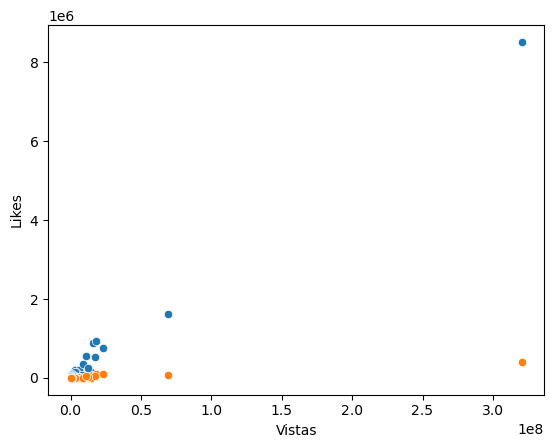

In [3]:
# Revisamos las correlaciones

sns.scatterplot(x='Vistas', y='Likes', data=yt_merged)
sns.scatterplot(x='Vistas', y='Comentarios', data=yt_merged)

In [4]:
correlaciones = yt_merged[["Vistas", "Likes", "Comentarios"]]

maximo_comentarios = correlaciones["Comentarios"].max()
print(maximo_comentarios)

maximo_vista = correlaciones["Vistas"].max()
print(maximo_vista)
#sns.pairplot(correlaciones)

390972
320363632


<Axes: xlabel='Vistas', ylabel='Likes'>

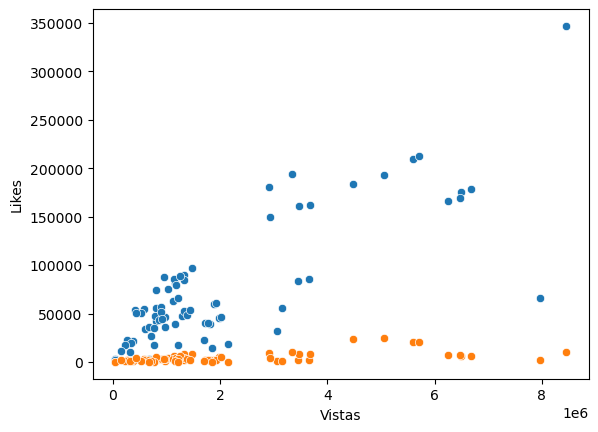

In [5]:
# Quitamos los datos mayores puesto que hacen que el rango sea muy grande
correlaciones = correlaciones[correlaciones["Comentarios"] < 390972]
correlaciones = correlaciones[correlaciones["Vistas"] < 8515277]

sns.scatterplot(x='Vistas', y='Likes', data=correlaciones)
sns.scatterplot(x='Vistas', y='Comentarios', data=correlaciones)


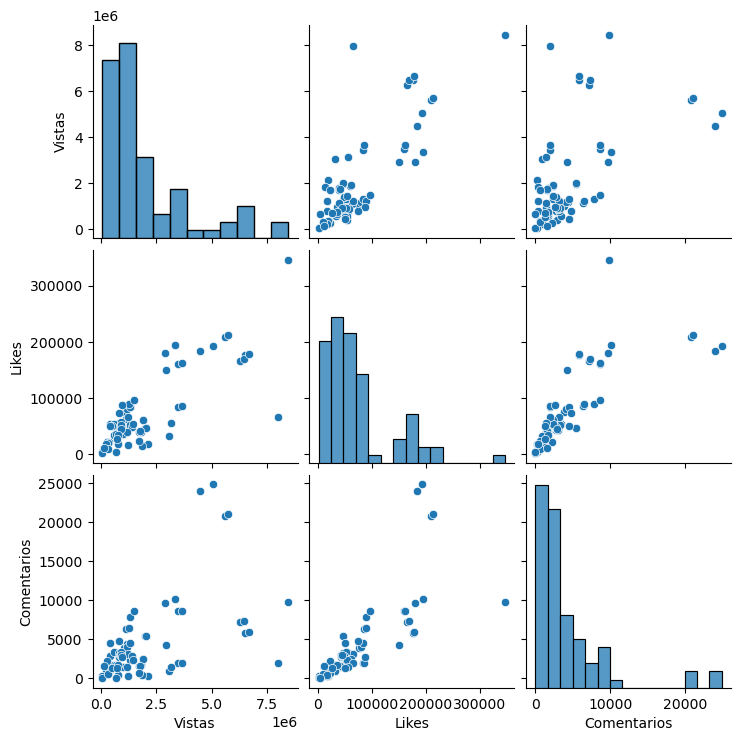

In [6]:
sns.pairplot(correlaciones)

<Axes: >

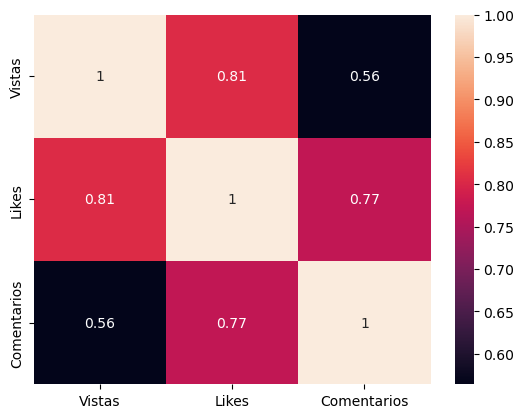

In [7]:
sns.heatmap(correlaciones.corr(),annot=True)

### **Respuesta**

Según lo observado en el gráfico de pares y el mapa de calor.
- Existe una **fuerte relación positiva** entre las visualizaciones y los *likes*, con un coeficiente de 0.81. Además, el gráfico muestra una tendencia clara y ascendente.
- La relación entre visualizaciones y comentarios es menor. Aunque hay una conexión, no es tan significativa como la anterior incluso mostrando un gráfico más desordenado y dificil de interpretar.

#### Conclusión
La característica más relacionada con el aumento de visualizaciones son los **likes**, lo que sugiere que los videos que reciben más *likes* suelen generar un mayor número de visualizaciones.

### 2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

In [54]:
# Para responder estas preguntas analizaremos cuantos titulos están dentro de los dos dataframes

sp_chile = pd.read_csv("data/spotify_chile.csv")
sp_global = pd.read_csv("data/spotify_global.csv")
sp_eeuu = pd.read_csv("data/spotify_eeuu.csv")
sp_merged = pd.concat([sp_global, sp_eeuu, sp_chile]).drop_duplicates().reset_index(drop=True)

last_chile = pd.read_csv("data/last.fm_chile.csv")
last_global = pd.read_csv("data/last.fm_global.csv")
last_eeuu = pd.read_csv("data/last.fm_eeuu.csv")
last_merged = pd.concat([last_global, last_eeuu, last_chile]).drop_duplicates().reset_index(drop=True)

In [9]:
# Para responder esta pregunta creamos un csv con las canciones en tendencia en spotify buscadas en youtube

yt_spotify_1 = pd.read_csv("data/videos_spotify_global.csv")
yt_lastf_1 = pd.read_csv("data/videos_last.fm_global.csv")
yt_global_1 = pd.read_csv("data/videos_global.csv")
yt_global_1

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]
5,"Dos Días - Tito Double P, Peso Pluma (Video Of...",13362287,149392,3065,2024-11-01T01:00:08Z,"['#TitoDoubleP', '#DosDias']"
6,Yailin La Mas Viral - Bing Bong (Video Oficial),4486001,183876,23990,2024-11-06T00:00:06Z,['#bingbong']
7,St. Chroma,9767138,267970,13910,2024-10-28T10:02:12Z,[]
8,Rod Wave - Westside Connection (Official Video),408447,53480,2899,2024-11-11T05:00:07Z,['#LastLap']
9,Nino Paid - Play This At My Funeral (Official ...,1118910,63121,3115,2024-11-04T17:00:06Z,[]


In [10]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"


In [11]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_lastf_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"
2,Sticky


In [12]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_lastf_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,"Lady Gaga, Bruno Mars - Die With A Smile (Offi..."
1,Sailor Song
2,St. Chroma
3,"Billie Eilish, Khalid - lovely"
4,Sabrina Carpenter - Please Please Please (Offi...
5,ROSÉ & Bruno Mars - APT. (Official Music Video)
6,"Good Luck, Babe!"
7,Wiz Khalifa - See You Again ft. Charlie Puth [...
8,Sabrina Carpenter - Espresso (Official Video)
9,Like Him


### **Respuesta** 

- Al analizar los *dataframes* que cruzan títulos populares en YouTube con Spotify, se observa que **no existe una gran similitud** entre los éxitos de estas plataformas. Esto indica que el éxito en YouTube no se traduce automáticamente en popularidad en Spotify.
- De manera similar, los títulos exitosos de YouTube tampoco presentan una conexión significativa con los de Last.fm.

#### Conclusión  
Aunque no se encontró una relación sólida entre YouTube y las otras plataformas, **sí existe una fuerte similitud** entre los éxitos de Spotify y Last.fm, lo que sugiere una mayor convergencia en los gustos musicales de los usuarios en estas dos plataformas.

### 3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify?

In [13]:
yt_en_spotify = pd.read_csv("data/youtube_en_spotify_global.csv")

In [14]:
yt_en_spotify.head()

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Artista,Popularidad,Generos
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,"['reggaeton', 'reggaeton colombiano', 'urbano ..."
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,"['baton rouge rap', 'rap']"
2,YoungBoy Never Broke Again - Killa Season,1164882,81449,4392,2024-11-08T04:16:17Z,[],YoungBoy Never Broke Again,59,"['baton rouge rap', 'rap']"
3,YoungBoy Never Broke Again - Missing Everything,1132351,86119,6341,2024-11-08T02:20:12Z,[],YoungBoy Never Broke Again,57,"['baton rouge rap', 'rap']"
4,YoungBoy Never Broke Again - Catch Me,812399,55568,2963,2024-11-08T02:20:09Z,[],YoungBoy Never Broke Again,54,"['baton rouge rap', 'rap']"


In [15]:
yt_en_spotify['Generos'] = yt_en_spotify['Generos'].apply(ast.literal_eval)

In [16]:
df_exploded = yt_en_spotify.explode('Generos')

In [17]:
df_exploded

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Artista,Popularidad,Generos
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,reggaeton
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,reggaeton colombiano
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,urbano latino
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,baton rouge rap
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,rap
...,...,...,...,...,...,...,...,...,...
29,Kodak Black - Catch Fire,863485,42938,3008,2024-11-05T07:20:39Z,['#CatchFire'],Kodak Black,62,melodic rap
29,Kodak Black - Catch Fire,863485,42938,3008,2024-11-05T07:20:39Z,['#CatchFire'],Kodak Black,62,miami hip hop
29,Kodak Black - Catch Fire,863485,42938,3008,2024-11-05T07:20:39Z,['#CatchFire'],Kodak Black,62,rap
29,Kodak Black - Catch Fire,863485,42938,3008,2024-11-05T07:20:39Z,['#CatchFire'],Kodak Black,62,trap


In [18]:
df_exploded["Cantidad"] = 1

In [19]:
df_generos = df_exploded[["Generos", "Cantidad"]].groupby('Generos').sum().reset_index()

In [20]:
df_generos

,Generos,Cantidad
0,5th gen k-pop,1
1,atl hip hop,1
2,baton rouge rap,7
3,bc underground hip hop,1
4,canadian hip hop,1
5,ccm,1
6,corrido,2
7,corridos tumbados,1
8,country rap,1
9,dembow,1


In [21]:
def categorizar_genero(genero):
    if 'pop' in genero:
        return 'Pop'
    elif 'rap' in genero:
        return 'Rap'
    elif 'reggaeton' in genero:
        return 'Reggaeton'
    elif 'corrido' in genero:
        return 'Corridos'
    elif 'worship' in genero or 'ccm' in genero:
        return 'Religioso'
    elif 'rock' in genero:
        return 'Rock'
    elif 'hip hop' in genero:
        return 'Hip Hop'
    elif 'jazz' in genero:
        return 'Jazz'
    elif 'blues' in genero:
        return 'Blues'
    elif "Urbano" in genero:
        return 'Urbano'
    elif "salsa" in genero:
        return 'Salsa'
    elif "trap" in genero:
        return 'Trap'
    elif "country" in genero:
        return 'Country'
    elif "indie" in genero:
        return 'Indie'
    elif "r&b" in genero:
        return 'r&b'
    elif "singer-songwriter" in genero:
        return 'singer-songwriter'
    elif "soul" in genero:
        return 'singer-songwriter'
    elif "romantic" in genero:
        return 'romantic'
    elif "wave" in genero:
        return 'wave'
    elif "contemporary" in genero:
        return 'contemporary'
    else:
        return genero

df_generos['Categoria'] = df_generos['Generos'].apply(categorizar_genero)

In [22]:
df_categoria = df_generos[["Categoria", "Cantidad"]].groupby('Categoria').sum().reset_index()

In [23]:
df_categoria

,Categoria,Cantidad
0,Corridos,3
1,Hip Hop,9
2,Pop,4
3,Rap,32
4,Reggaeton,3
5,Religioso,2
6,Rock,1
7,contemporary,1
8,dembow,1
9,florida drill,2


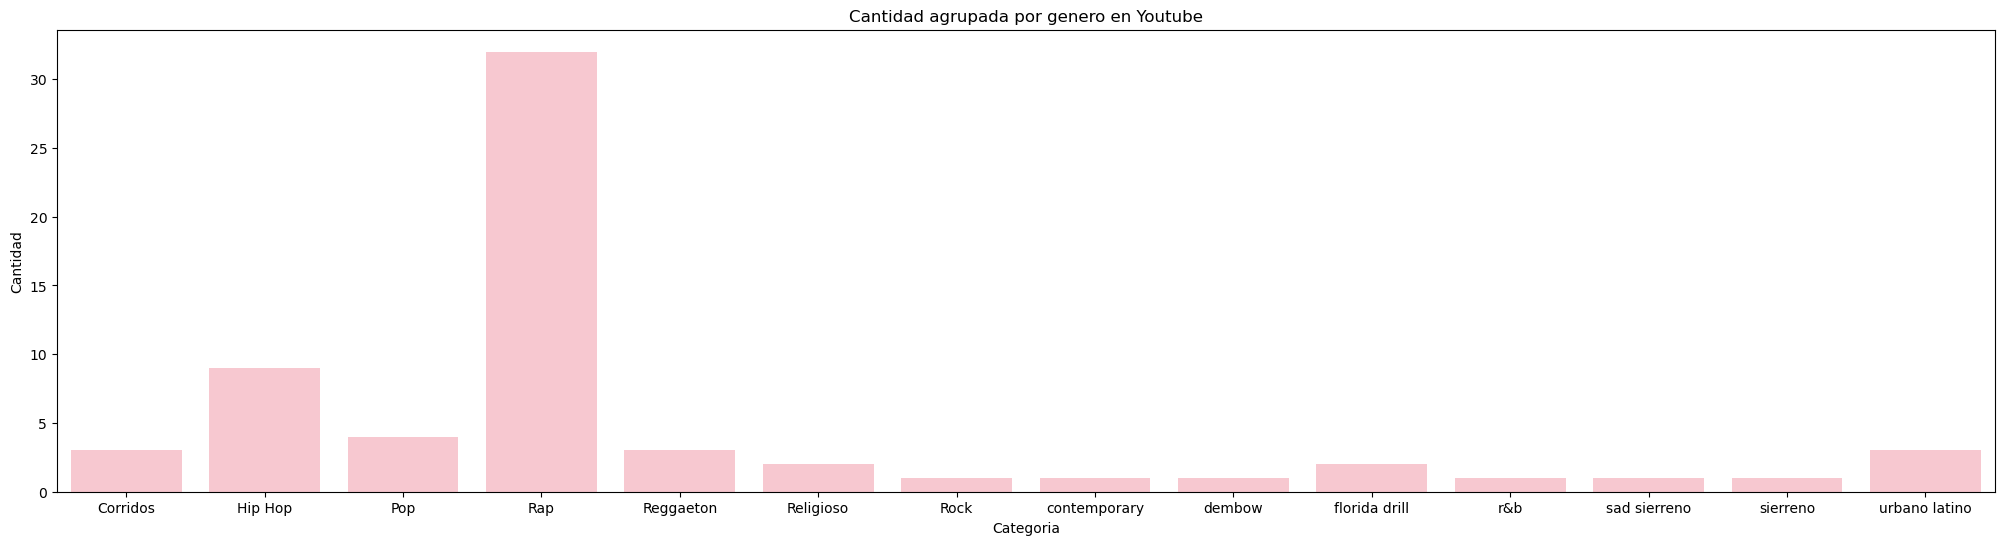

In [24]:
## Gráfico
#creamos el gráfico de barras para poder visualizar la información
fig = plt.figure(figsize=(25,6)) #crear la figura y dimension
ax = fig.add_subplot(111)
sns.barplot(data=df_categoria, x='Categoria', y='Cantidad', color='pink')
plt.title("Cantidad agrupada por genero en Youtube")
plt.show()


In [36]:
#hacemos el mismo mecanismo con la plataforma spotify
spotify_glo = pd.read_csv("data/spotify_global.csv")
spotify_glo

,Titulo,Artista,Popularidad,Generos
0,That’s So True,Gracie Abrams,91,['alt z']
1,Die With A Smile,Lady Gaga,100,"['art pop', 'dance pop', 'pop']"
2,Sailor Song,Gigi Perez,93,['bedroom pop']
3,"Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)","Tyler, The Creator",87,"['hip hop', 'rap']"
4,St. Chroma (feat. Daniel Caesar),"Tyler, The Creator",89,"['hip hop', 'rap']"
5,BIRDS OF A FEATHER,Billie Eilish,97,"['art pop', 'pop']"
6,Who,Jimin,92,['k-pop']
7,Taste,Sabrina Carpenter,94,['pop']
8,APT.,ROSÉ,97,['k-pop']
9,Timeless (with Playboi Carti),The Weeknd,92,"['canadian contemporary r&b', 'canadian pop', ..."


In [37]:
spotify_glo['Generos'] = spotify_glo['Generos'].apply(ast.literal_eval)
spotify_glo['Generos']


0                                               [alt z]
1                             [art pop, dance pop, pop]
2                                         [bedroom pop]
3                                        [hip hop, rap]
4                                        [hip hop, rap]
5                                        [art pop, pop]
6                                               [k-pop]
7                                                 [pop]
8                                               [k-pop]
9        [canadian contemporary r&b, canadian pop, pop]
10                                          [indie pop]
11                                       [art pop, pop]
12                                       [hip hop, rap]
13                                              [alt z]
14                                                [pop]
15                                       [hip hop, rap]
16                                       [hip hop, rap]
17                        [modern country pop, p

In [40]:
df_exploracion = spotify_glo.explode('Generos')
df_exploracion["Cantidad"] = 1
df_genero = df_exploracion[["Generos", "Cantidad"]].groupby('Generos').sum().reset_index()
df_genero


,Generos,Cantidad
0,alt z,2
1,art pop,3
2,australian hip hop,1
3,bedroom pop,2
4,brooklyn indie,1
5,canadian contemporary r&b,1
6,canadian pop,1
7,chill abstract hip hop,1
8,classic oklahoma country,5
9,conscious hip hop,1


In [41]:
def categorizar_genero(genero):
    if 'pop' in genero:
        return 'Pop'
    elif 'rap' in genero:
        return 'Rap'
    elif 'reggaeton' in genero:
        return 'Reggaeton'
    elif 'corrido' in genero:
        return 'Corridos'
    elif 'worship' in genero or 'ccm' in genero:
        return 'Religioso'
    elif 'rock' in genero:
        return 'Rock'
    elif 'hip hop' in genero:
        return 'Hip Hop'
    elif 'jazz' in genero:
        return 'Jazz'
    elif 'blues' in genero:
        return 'Blues'
    elif "Urbano" in genero:
        return 'Urbano'
    elif "salsa" in genero:
        return 'Salsa'
    elif "trap" in genero:
        return 'Trap'
    elif "country" in genero:
        return 'Country'
    elif "indie" in genero:
        return 'Indie'
    elif "r&b" in genero:
        return 'r&b'
    elif "singer-songwriter" in genero:
        return 'singer-songwriter'
    elif "soul" in genero:
        return 'singer-songwriter'
    elif "romantic" in genero:
        return 'romantic'
    elif "wave" in genero:
        return 'wave'
    elif "contemporary" in genero:
        return 'contemporary'
    else:
        return genero

df_genero['Categoria'] = df_genero['Generos'].apply(categorizar_genero)
        

In [42]:
df_category = df_genero[["Categoria", "Cantidad"]].groupby('Categoria').sum().reset_index()
df_category

,Categoria,Cantidad
0,Corridos,2
1,Country,6
2,Hip Hop,13
3,Indie,5
4,Pop,32
5,Rap,14
6,Rock,4
7,alt z,2
8,contemporary,1
9,r&b,1


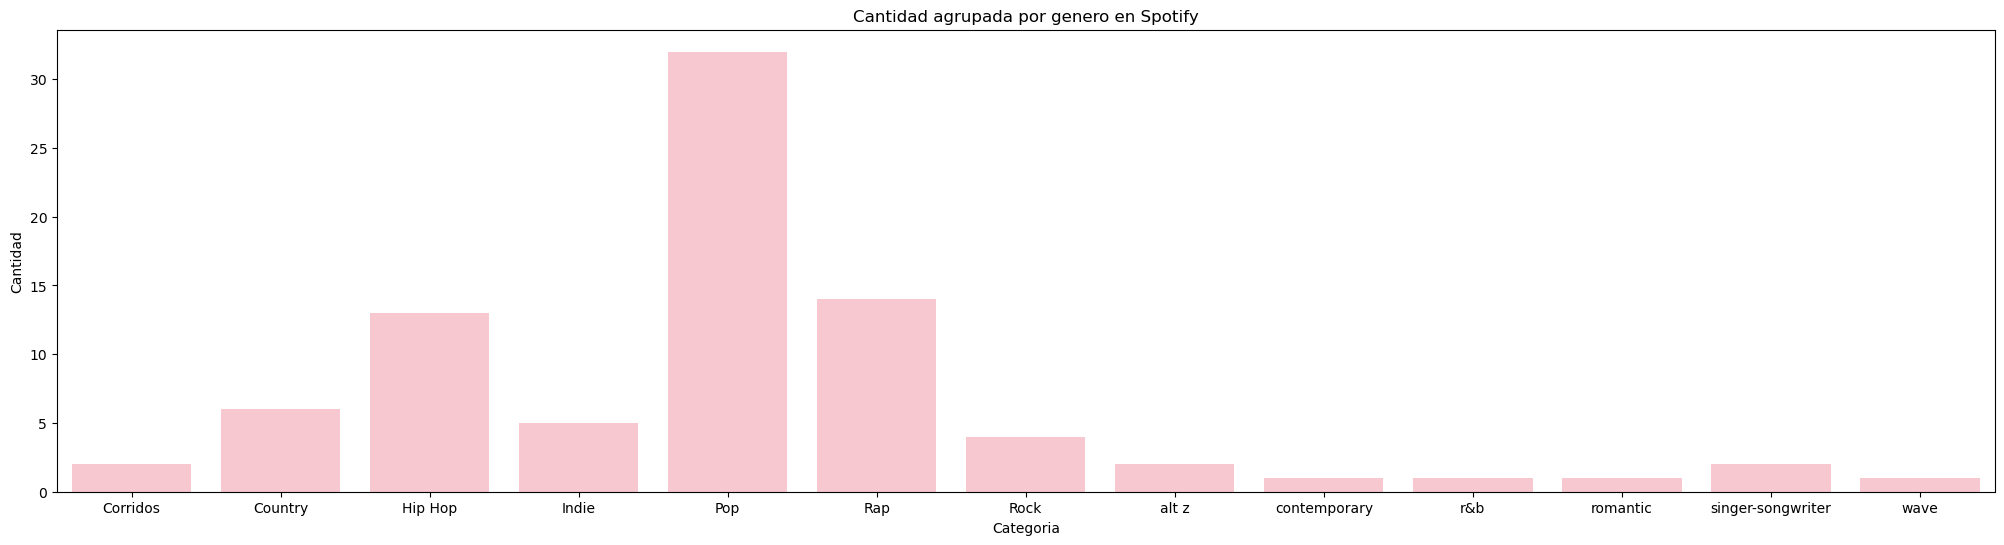

In [43]:
## Gráfico
#creamos el gráfico de barras para poder visualizar la información
fig = plt.figure(figsize=(25,6)) #crear la figura y dimension
ax = fig.add_subplot(111)
sns.barplot(data=df_category, x='Categoria', y='Cantidad', color='pink')
plt.title("Cantidad agrupada por genero en Spotify")
plt.show()

### **Respuesta**  
Los géneros más populares en YouTube son: **Rap**, **Hip Hop** y **Pop**. Estas tendencias también se reflejan en Spotify, ya que los mismos géneros ocupan los primeros lugares en interacción. Sin embargo, el **orden de popularidad varía** entre ambas plataformas.

#### Conclusión  
Las preferencias de los usuarios en YouTube tienen un impacto claro en los géneros más escuchados en Spotify, demostrando una conexión entre ambas plataformas en cuanto a tendencias musicales.

### 4. ¿Cuál es la relación entre el número de visualizaciones en YouTube con la popularidad en Spotify y los oyentes en Last.fm? ¿A qué se debe?

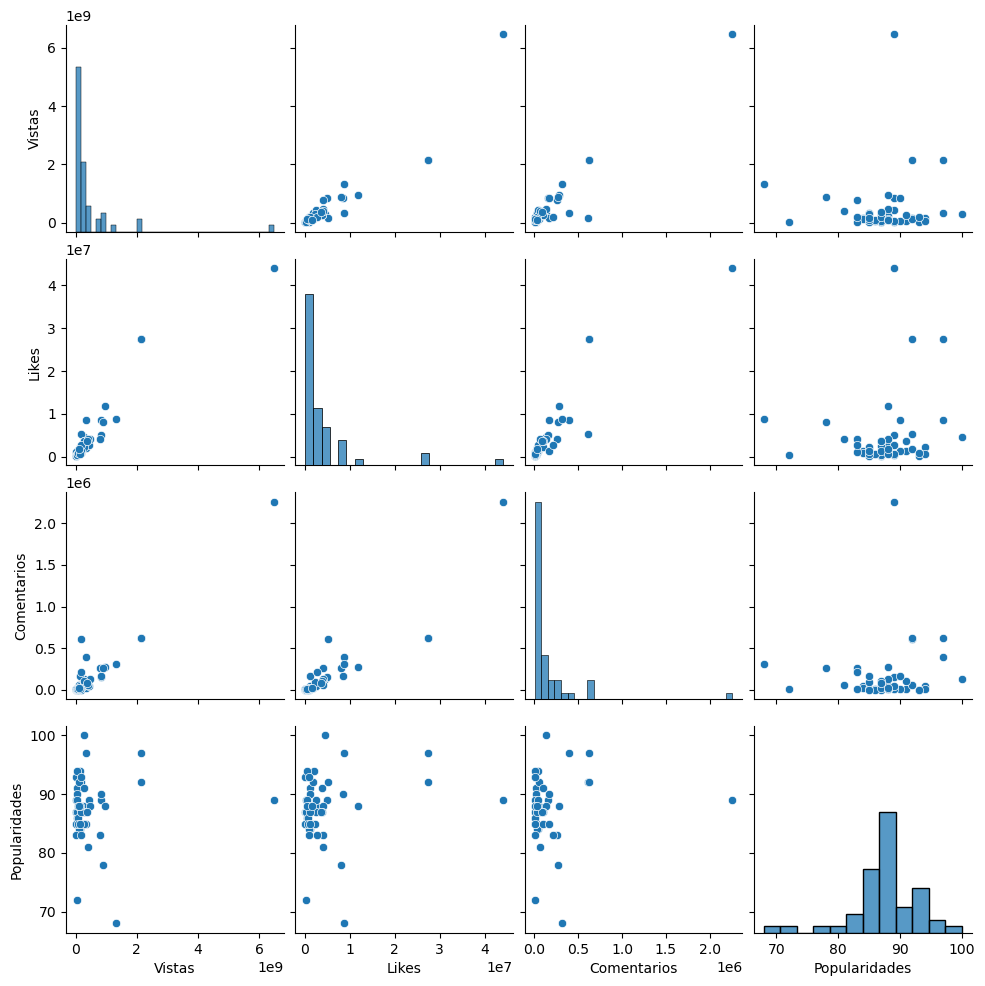

In [44]:
#leemos el archivo videos_spotify_global.csv  para ver la relacion entre youtube y spotify
yt_spotify = pd.read_csv("data/videos_spotify_global.csv")
#sacamos las columnas de interes para saber como se relacionan con las dos variables mencionadas
columns = ['Vistas', 'Likes', 'Comentarios', 'Popularidades']
df_principal = yt_spotify[columns]
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
graficos = sns.pairplot(df_principal)

In [45]:
#vamos a ver cual es el maximo del df para poder eliminar los outliers
max = df_principal.max()
#hacemos limpieza de outliers
df_principal = df_principal[df_principal['Vistas'] < max['Vistas']]
df_principal.max()

Vistas           2138326363
Likes              27467850
Comentarios          626681
Popularidades           100
dtype: int64

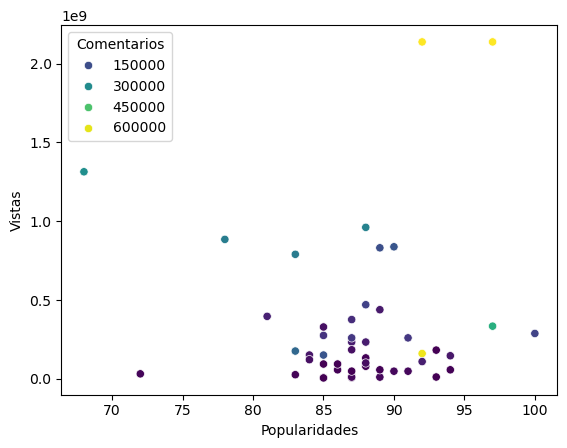

In [46]:
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
sns.scatterplot(x="Popularidades", y="Vistas", hue="Comentarios", palette="viridis", data=df_principal)
plt.show()

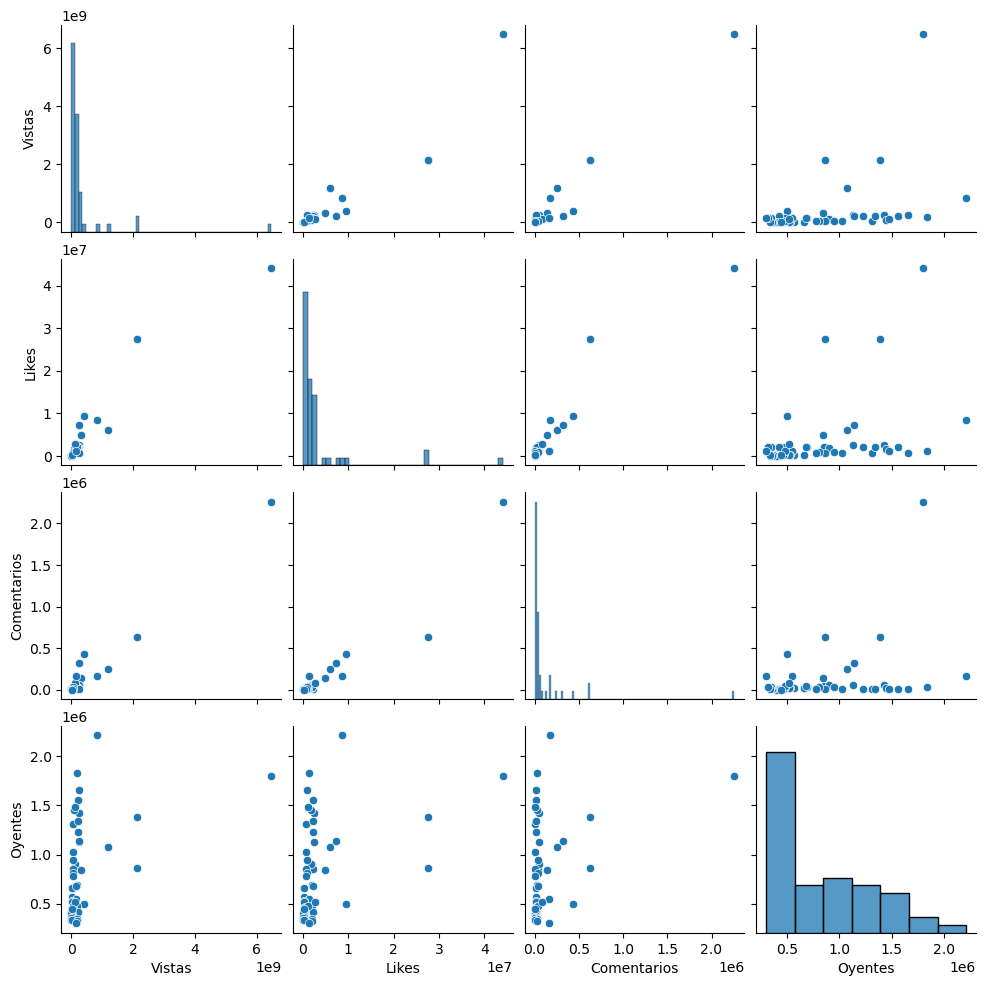

In [47]:
#leemos el archivo videos_spotify_global.csv  para ver la relacion entre youtube y last.fm
yt_last_g = pd.read_csv("data/videos_last.fm_global.csv")
#sacamos las columnas de interes para saber como se relacionan con las dos variables mencionadas
columns = ['Vistas', 'Likes', 'Comentarios', 'Oyentes']
df_principal = yt_last_g[columns]
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
graficos = sns.pairplot(df_principal)


In [48]:
#vamos a ver cual es el maximo del df para poder eliminar los outliers
max = df_principal.max()
#hacemos limpieza de outliers
df_principal = df_principal[df_principal['Vistas'] < max['Vistas']]
df_principal.max()

Vistas         2142079536
Likes            27501091
Comentarios        627758
Oyentes           2208222
dtype: int64

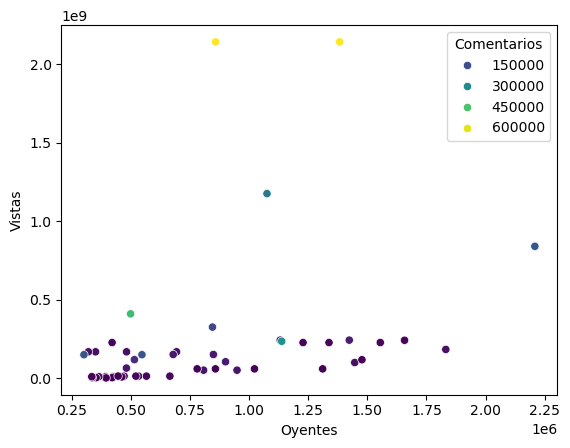

In [49]:
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
sns.scatterplot(x="Oyentes", y="Vistas", hue="Comentarios", palette="viridis", data=df_principal)
plt.show()

### **Respuesta**
 
- Los gráficos muestran que **no existe una relación significativa** entre las visitas en YouTube y el número de oyentes en Spotify. Es decir, la cantidad de oyentes, ya sea alta o baja, no influye ni positiva ni negativamente en el número de visitas en YouTube.  
- De manera similar, la **popularidad en Last.fm** tampoco guarda una relación directa con las visitas de YouTube, sin evidenciar ninguna tendencia positiva o negativa.

#### Conclusión  
Las métricas de éxito entre estas plataformas parecen ser independientes, lo que sugiere que la popularidad en una no garantiza resultados equivalentes en las demás.

### 5. ¿Hay patrones de horarios en que se suben los videos más exitosos?

In [50]:
import pandas as pd
#hacemos copia del dataframe
#dividimos la columna fecha en dos una de fecha y otra de hora
yt_copia = yt_merged.copy()
yt_copia['Fecha'] = pd.to_datetime(yt_copia['Fecha'], errors='coerce')
yt_copia['Hora'] = yt_copia['Fecha'].dt.time
yt_copia['Fecha'] = yt_copia['Fecha'].dt.date
yt_copia

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Hora
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08,['#57'],00:00:06
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08,[],03:41:23
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08,[],04:16:17
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08,[],02:20:12
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08,[],02:20:09
...,...,...,...,...,...,...,...
82,"LIT killah, TULI - MALA SUERTE (Official Video)",514359,51016,1321,2024-11-08,"['#MALASUERTE', '#TULI']",22:00:07
83,Pac-Man vs Kirby. Épicas Batallas de Rap del F...,428853,50316,4518,2024-11-07,[],20:00:06
84,"Valentino merlo, Salastkbron - Me voy (Officia...",713734,27106,1267,2024-11-07,[],23:00:08
85,Lo Grande Que Es Perdonar (feat. Gilberto Sant...,680358,3230,30,2024-11-01,[],04:00:21


In [51]:
# creamos un nuevo data que nos servira para el analisis
df_analisis = yt_copia[['Hora']].copy()
# agregamos una nueva columna para agruparlos
df_analisis['Cantidad'] = 1
# para generalizar más solo nos centraremos en la hora
df_analisis['Hora'] = pd.to_datetime(df_analisis['Hora'], format='%H:%M:%S')
df_analisis['Hora_solo'] = df_analisis['Hora'].dt.hour
# agrupamos segun hora
df_analisis = df_analisis.groupby('Hora_solo', as_index=False)['Cantidad'].sum()
df_analisis

,Hora_solo,Cantidad
0,0,20
1,1,3
2,2,12
3,3,4
4,4,5
5,5,5
6,6,2
7,7,2
8,8,1
9,10,11


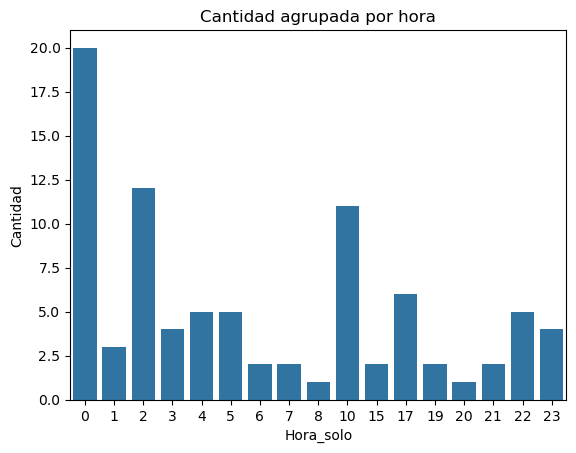

In [52]:
#creamos el gráfico de barras para poder visualizar la información
sns.barplot(data=df_analisis, x='Hora_solo', y='Cantidad')
plt.title("Cantidad agrupada por hora")
plt.show()

### **Respuesta**
 
Se identificó un **patrón claro** entre los videos más populares y los horarios en los que son subidos. Los **videos musicales** publicados en los horarios de **00:00**, **02:00** y **10:00** tienden a tener un estreno exitoso, logrando una alta interacción por parte de los usuarios en la plataforma.

#### Conclusión  
El horario de publicación juega un papel importante en el éxito de los videos musicales, destacando que ciertos momentos del día favorecen la visibilidad y el impacto entre los usuarios.

## Análisis de Datos

EL siguiente apartado tiene como proposito responder a la pregunta:
**¿Se puede hacer un modelo para predecir que tan popular será una canción en spotify en base a su éxito en Youtube?**

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# Ejemplo de DataFrame:
# df = pd.DataFrame({'Comentarios': [...], 'Log_Vistas': [...]})

# Variables predictoras y objetivo
X = df_sin_outliers[['Comentarios']].values  # Predictor (Comentarios)
y = df_sin_outliers['Log_Vistas'].values  # Variable objetivo (Log de Vistas)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(
    max_depth=7, 
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

#tree_model = DecisionTreeRegressor(max_depth=5,min_samples_split=20, min_samples_leaf=5, random_state=42)  # Cambia max_depth según la complejidad que desees

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

# Evaluar el desempeño
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("Conjunto de entrenamiento:")
print(f"RMSE (train): {rmse_train}")
print(f"R^2 (train): {r2_train}")

print("\nConjunto de prueba:")
print(f"RMSE (test): {rmse_test}")
print(f"R^2 (test): {r2_test}")

# Visualizar el árbol (opcional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=['Comentarios'], filled=True, rounded=True)
plt.title('Árbol de Decisión')
plt.show()

# Visualización de las predicciones
plt.scatter(X_test, y_test, alpha=0.7, label="Datos reales")
plt.scatter(X_test, y_pred_test, color='r', alpha=0.6, label="Predicciones")
plt.xlabel("Comentarios")
plt.ylabel("Log de Vistas")
plt.legend()
plt.title("Árbol de Decisión: Predicciones vs Reales")
plt.show()


NameError: name 'df_sin_outliers' is not defined

## Resumen de los resusltados

## ¿Qué podría salir mal?